# Map trajectories with basemap and bathymetry

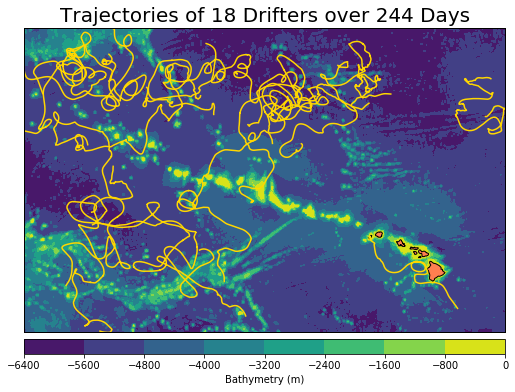

In [41]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

pfile = Dataset('Drifters18_244days.nc', 'r')
bath_data = Dataset('HAWc0.04_depth.cdf')

# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='gold')

# Set up processing for bathymetry data
lats = bath_data.variables['Y_B'][:]
lons = bath_data.variables['X_B'][:]
BATHY_OUT = bath_data.variables['BATHY_OUT'][:] # etopo1 bedrock global relief model-topography/bathymetry (m)

lons,lats= np.meshgrid(lons,lats)
x,y = mapper(lons,lats)

# Create contour object and add to the mapper
depth = mapper.contourf(x,y,BATHY_OUT[0])

# Add legend
cb = mapper.colorbar(depth,"bottom", size="5%", pad="2%")
cb.set_label('Bathymetry (m)')

# Change plot titles
plt.title('Trajectories of 18 Drifters over 244 Days', fontsize=20)
plt.savefig('Drifters18_244days_bathy_map.png')

plt.show()